In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [21]:
df = pd.read_csv("dataset/diabetes.csv")

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [5]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
229469,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
229470,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
229471,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229472,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229473,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<AxesSubplot: >

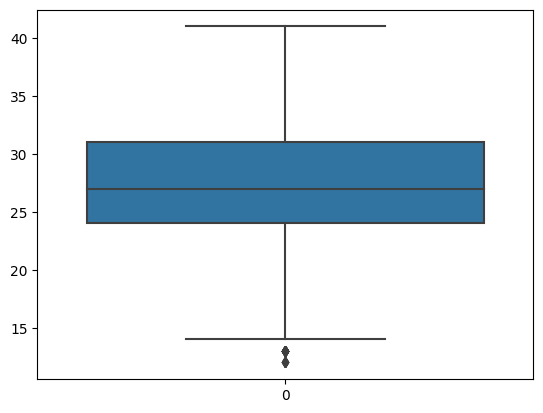

In [6]:
sns.boxplot(df[df['BMI'] < 42]['BMI'])

<AxesSubplot: >

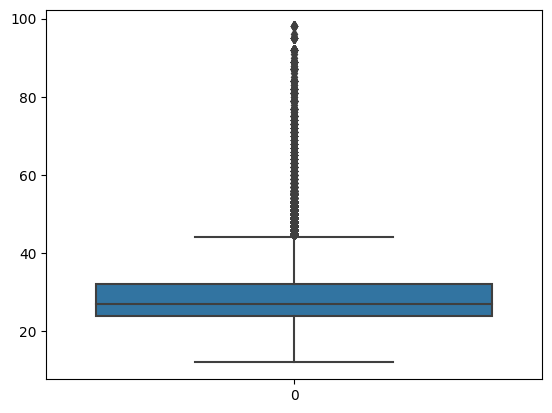

In [7]:
sns.boxplot(df['BMI'])

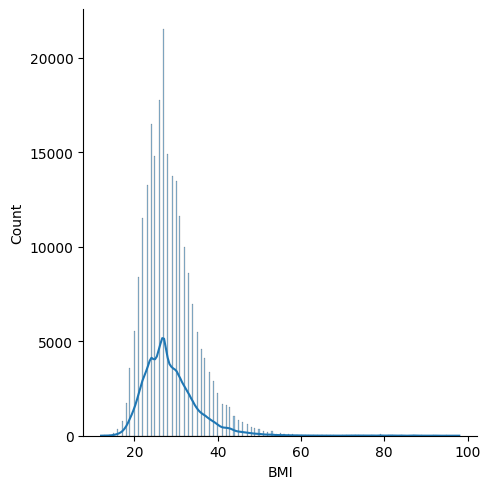

In [8]:
sns.displot(df['BMI'], kde=True)

## Preprocessing

In [22]:
# Convert to int

df_ = df.astype('int').copy()
df_.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
229469,0,1,0,1,42,0,0,0,1,1,...,1,0,3,14,4,0,1,3,6,8
229470,0,0,0,1,27,0,0,0,0,0,...,1,0,1,0,0,0,0,3,6,5
229471,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
229472,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
229473,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [23]:
# Drop unusued features

unused_columns = ['AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']

df_.drop(columns=unused_columns, axis=1, inplace=True)
df_.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex,Age
229469,0,1,0,1,42,0,0,0,1,1,1,0,3,1,3
229470,0,0,0,1,27,0,0,0,0,0,1,0,1,0,3
229471,0,1,1,1,45,0,0,0,0,1,1,0,3,1,5
229472,0,0,0,1,28,0,0,0,1,1,0,0,1,0,2
229473,0,1,0,1,23,0,0,0,0,1,1,0,3,1,7


In [24]:
# Feature engineering functions

def convert_bmi(bmi):
    if bmi > 30:
        return 1
    return 0

def convert_age(age):
    if age > 6:
        return 1
    return 0

In [26]:
df_['BMI'] = df_['BMI'].apply(convert_bmi)
df_['Age'] = df_['Age'].apply(convert_age)

df_.rename(columns={'BMI':'Obesity', 'Age':'Old'}, inplace=True)
df_.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,Obesity,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex,Old
229469,0,1,0,1,0,0,0,0,1,1,1,0,3,1,0
229470,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
229471,0,1,1,1,0,0,0,0,0,1,1,0,3,1,0
229472,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
229473,0,1,0,1,0,0,0,0,0,1,1,0,3,1,1


In [32]:
# Split Data
# Full -> Train & Validation (7:3)
# Validation -> Validation & Test (8:2)

X = df_.drop(columns=['Diabetes_binary'])
y = df_['Diabetes_binary']

# Train x Validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = 0.2,
    random_state=42
)

# # Validation x Test
# X_val, X_test, y_val, y_test = train_test_split(
#     X_val, y_val,
#     test_size=0.2,
#     random_state=42
# )

print('Train\t:', X_train.shape, y_train.shape)
print('Val\t:', X_val.shape, y_val.shape)
# print('Test\t:', X_test.shape, y_test.shape)

Train	: (183579, 14) (183579,)
Val	: (45895, 14) (45895,)


In [33]:
# Oversampling using SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print('Train\t:', X_train.shape, y_train.shape)

Train	: (310806, 14) (310806,)


## Modelling

In [13]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = []

In [14]:
original_class = []
predicted_class = []

# Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
  original_class.extend(y_true)
  predicted_class.extend(y_pred)
  return accuracy_score(y_true, y_pred)

In [34]:
# Build classifier model using RandomForrest

model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42)
nested_score = cross_val_score(
    model, X_train, y_train, cv=cv,
    scoring=make_scorer(classification_report_with_accuracy_score)
)

print(classification_report(original_class, predicted_class))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75    427357
           1       0.74      0.82      0.78    427357

    accuracy                           0.77    854714
   macro avg       0.77      0.77      0.77    854714
weighted avg       0.77      0.77      0.77    854714



In [35]:
model.fit(X_train, y_train)

val_yhat = model.predict(X_val)
print(classification_report(y_val, val_yhat))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78     38974
           1       0.29      0.73      0.41      6921

    accuracy                           0.68     45895
   macro avg       0.61      0.70      0.60     45895
weighted avg       0.84      0.68      0.73     45895

